# Advanced Matplotlib


# Drawing Subplots

In designing layouts of visual aids, it is often necessary to organize multiple relevant plots into panels in the same figure, such as when illustrating different aspects of the same dataset. Matplotlib provides a few ways to create figures with multiple subplots.


# Initiating a figure with plt.figure()

The plt.figure() API is the API that is used to initiate a figure that serves as the base canvas. It takes in arguments that determines the number of figures and parameters such as size and background color of the plot image. It displays a new area as the canvas for plotting axes when called. We wouldn't obtain any graphical output unless we add other plotting elements. If we were to call plt.show() at this point, we would see a Matplotlib figure object being returned, as shown in the following screen capture:

In [2]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()

When we are plotting simple figures that involve only a single plot, without the need for multiple panels, we can omit calling plt.figure(). If plt.figure() is not called or if no argument is supplied to plt.figure(), then a single figure is initiated by default, equivalent to plt.figure(1). If the dimension ratio of a figure is crucial, we should adjust it by passing a tuple of (width, height) as the figsize argument here.

# Initiating subplots as axes with plt.subplot()

To initiate the axes plot instances that actually frame each plot, we can use plt.subplot(). It takes three parameters: number of rows, number of columns, and plot number. When the total number of plots is less than 10, we can omit the delimiting commas in the input arguments. Here is a code snippet example:

<class 'matplotlib.axes._subplots.AxesSubplot'>


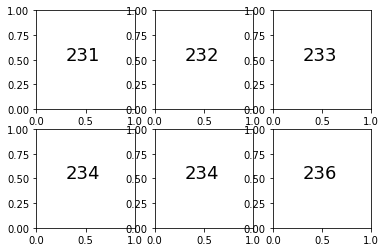

In [3]:
import matplotlib.pyplot as plt
# Initiates a figure area for plotting
fig = plt.figure()

# Initiates six subplot axes
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)

# Print the type of ax1
print(type(ax1))

# Label each subplot with corresponding identities
ax1.text(0.3,0.5,'231',fontsize=18)
ax2.text(0.3,0.5,'232',fontsize=18)
ax3.text(0.3,0.5,'233',fontsize=18)
ax4.text(0.3,0.5,'234',fontsize=18)
ax5.text(0.3,0.5,'234',fontsize=18)
ax6.text(0.3,0.5,'236',fontsize=18)

plt.show()


# Adding subplots with plt.figure.add_subplot()

There is an add_subplot() function similar to plt.subplot() under plt.figure() that allows us to create additional subplots under the same figure. Similar to plt.subplot(), it takes the row number, column number, and plot number as input arguments and allows arguments without commas for fewer than 10 plots.

We can also initiate the first subplot using this function. This code is a quick example:

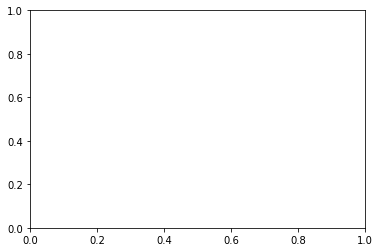

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111) 

plt.show()

This creates an empty plot area enclosed by four spines containing the x axis and y axis, as shown below. Note that we must call the add_subplot() function under a figure but not by plt.<br>
This creates an empty plot area enclosed by four spines containing the x axis and y axis, as shown below. Note that we must call the add_subplot() function under a figure but not by plt:

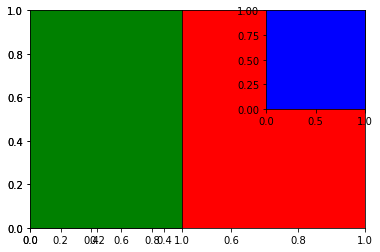

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111,facecolor='red')
ax2 = fig.add_subplot(121,facecolor='green')
ax3 = fig.add_subplot(233,facecolor='blue')

plt.show()

Next, we replace fig.add_subplot() with plt.subplot():

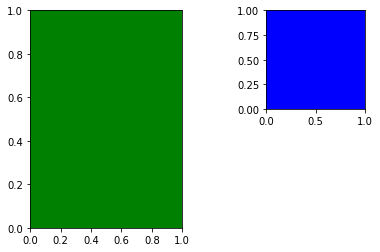

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure() # Note this line is optional here
ax1 = plt.subplot(111,facecolor='red')
ax2 = plt.subplot(121,facecolor='green')
ax3 = plt.subplot(233,facecolor='blue')

plt.show()

If we have already plotted the first subplot using plt.subplot() and would like to create additional subplots, we can call the plt.gcf() function to retrieve the figure object and store it as a variable. Then, we can call fig.add_subplot() as shown in the example before.
<br>
Hence, the following code is an alternative way to generate the three overlapping subplots:

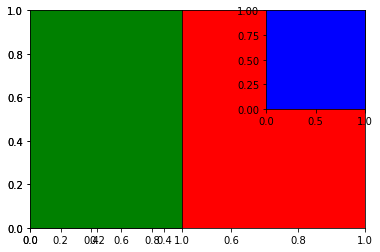

In [7]:
import matplotlib.pyplot as plt

ax1 = plt.subplot(111,facecolor='red')
fig = plt.gcf() # get current figure
ax2 = fig.add_subplot(121,facecolor='green')
ax3 = fig.add_subplot(233,facecolor='blue')

plt.show()


# Initiating an array of subplots with plt.subplots()

When we need to create a larger number of subplots of the same size, it can be quite inefficient to generate them one by one with the plt.subplot() or fig.add_subplot() function. In this case, we can call plt.subplots() to generate an array of subplots at once.
<br>
plt.subplots() takes in the number of rows and columns as input parameters, and returns a Figure together with a grid of subplots stored in a NumPy array. When there is no input parameter, plt.subplots() is equivalent to plt.figure() plus plt.subplot() by default.
<br>
Here is a code snippet for demonstration:

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


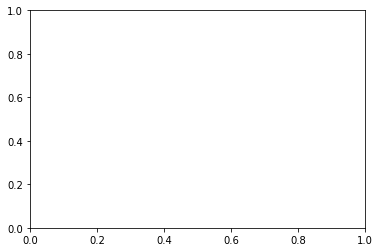

In [8]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(1,1)
print(type(fig))
print(type(axarr))

plt.show()

The next example illustrates a more useful case of  plt.subplots().
<br>
This time, we will create a figure of 3x4 subplots and label each in a nested for loop:

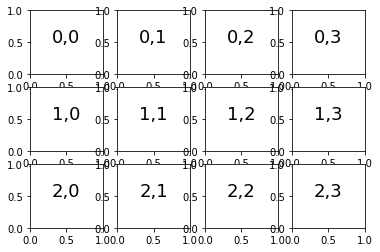

In [10]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(3,4)
for i in range(3):
    for j in range(4):
        axarr[i][j].text(0.3,0.5,str(i)+','+str(j),fontsize=18)

plt.show()

It is also possible to supply only one input parameter to plt.subplots(), which will be interpreted as the specified number of plots vertically stacked in rows. As the  plt.subplots() function has essentially incorporated the plt.figure() function, we can also specify the figure dimensions by providing input to the figsize argument:

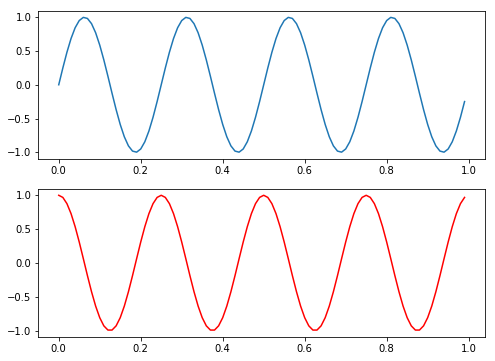

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 1.0, 0.01)
y1 = np.sin(8*np.pi*x)
y2 = np.cos(8*np.pi*x)

# Draw 1x2 subplots
fig, axarr = plt.subplots(2,figsize=(8,6))

axarr[0].plot(x,y1)
axarr[1].plot(x,y2,'red')

plt.show()


# Shared axes

When using plt.subplots(), we can specify that the subplots should share the x axis and/or y axis to avoid cluttering.
<br> 
Returning to the 3x4 subplots example earlier, suppose we turn on the shared axes option in plt.subplots() by supplying sharex=True and sharey=True as arguments, as in: 

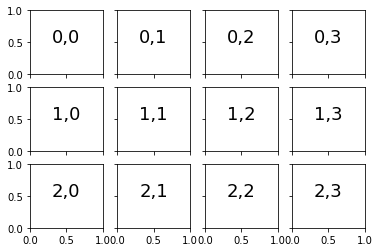

In [14]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(3,4,sharex=True,sharey=True)
for i in range(3):
    for j in range(4):
        axarr[i][j].text(0.3,0.5,str(i)+','+str(j),fontsize=18)

plt.show()


# Setting the margin with plt.tight_layout()

Next, we can adjust the alignment. We may want to adjust the margin between each subplot, or leave no margin instead of having rows and columns of discrete boxes. In this case, we can use the plt.tight_layout() function. By default, it fits all subplots into the figure area when no parameters are supplied. It takes the keyword arguments pad, w_pad, and h_pad to control the padding around subplots. Let's look at the following code example:

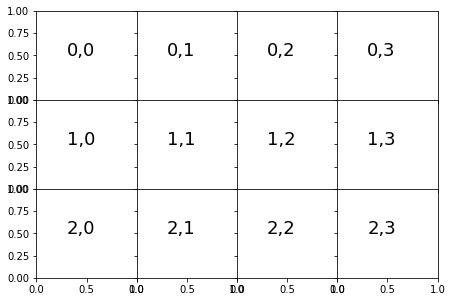

In [17]:
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(3,4,sharex=True,sharey=True)
for i in range(3):
    for j in range(4):
        axarr[i][j].text(0.3,0.5,str(i)+','+str(j),fontsize=18)

plt.tight_layout(pad=0, w_pad=-1.6, h_pad=-1)
plt.show()


# Aligning subplots of different dimensions with plt.subplot2grid()

While plt.subplots() provides a handy way to create grids of same-sized subplots, at times we may need to combine subplots of different sizes in a group. This is when plt.subplot2grid() comes into use.
<br>
plt.subplot2grid() takes in three to four parameters. The first tuple specifies the overall dimensions of the grid. The second tuple determines where in the grid the top left corner of a subplot starts. Finally we describe the subplot dimensions using the rowspan and colspan arguments.
<br>
Here is a code example to showcase the usage of this function:

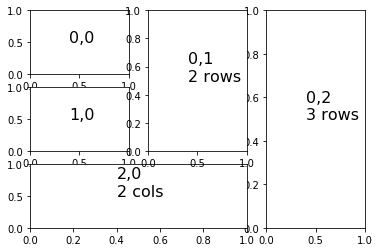

In [18]:
import matplotlib.pyplot as plt

axarr = []
axarr.append(plt.subplot2grid((3,3),(0,0)))
axarr.append(plt.subplot2grid((3,3),(1,0)))
axarr.append(plt.subplot2grid((3,3),(0,2), rowspan=3))
axarr.append(plt.subplot2grid((3,3),(2,0), colspan=2))
axarr.append(plt.subplot2grid((3,3),(0,1), rowspan=2))

axarr[0].text(0.4,0.5,'0,0',fontsize=16)
axarr[1].text(0.4,0.5,'1,0',fontsize=16)
axarr[2].text(0.4,0.5,'0,2\n3 rows',fontsize=16)
axarr[3].text(0.4,0.5,'2,0\n2 cols',fontsize=16)
axarr[4].text(0.4,0.5,'0,1\n2 rows',fontsize=16)

plt.show()


# Drawing inset plots with fig.add_axes()

It is not a must for subplots to align side by side. In some occasions, such as when zooming in or out, we can also embed subplots on top of the parent plot layer. This can be done by fig.add_axes(). To add a subplot, here is the basic usage: 

In [ ]:
fig = plt.figure() # or fig = plt.gcf()
fig.add_axes([left, bottom, width, height])

The left, bottom, width, and height parameters are specified relative to the parent figure in terms of float. Note that fig.add_axes() returns an axes object, so you may store it as a variable such as ax = fig.add_axes([left, bottom, width, height]) for further adjustments.
<br>
The following is a complete example where we try to plot the overview in a smaller embedded subplot:

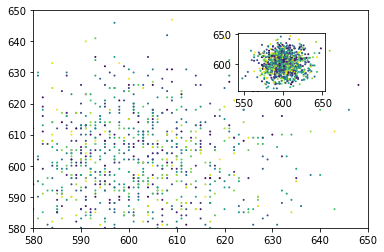

In [19]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
np.random.seed(100)
# Prepare data
x = np.random.binomial(1000,0.6,1000)
y = np.random.binomial(1000,0.6,1000)
c = np.random.rand(1000)

# Draw the parent plot
ax = plt.scatter(x,y,s=1,c=c)
plt.xlim(580,650)
plt.ylim(580,650)

# Draw the inset subplot
ax_new = fig.add_axes([0.6, 0.6, 0.2, 0.2])
plt.scatter(x,y,s=1,c=c)
plt.show()


# Adjusting subplot dimensions post hoc with plt.subplots_adjust

We can adjust the dimensions of a subplot with plt.subplots_adjust(), which takes in any combinations of parameters—left, right, top, and bottom—each defined relative to the parent axes.

# Adjusting axes and ticks

In data visualization, it is often not enough to only display the trend in a relative sense. An axis scale is essential to facilitate value estimation for proper interpretation. Ticks are markers on an axis that denote the scale for this purpose. Depending on the nature of data and figure layout, we often need to adjust the scale and tick spacing to provide enough information without clutter. In this section, we are going to introduce the customization methods.

# Customizing tick spacing with locators

There are two sets of ticks to mark coordinates on each axis: major and minor ticks. By default, Matplotlib tries to  automatically optimize the tick spacing and format based on the data input. Wherever manual adjustment is needed, it can be done through setting these four locators: xmajorLocator, xminorLocator, ymajorLocator, yminorLocator via the function set_major_locator, or set_minor_locator on the respective axis. The following is a usage example, where ax is an axes object:

In [ ]:
ax.xaxis.set_major_locator(xmajorLocator)    
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.yaxis.set_minor_locator(yminorLocator)


# Removing ticks with NullLocator

When NullLocator is used, ticks are removed from view.

# Locating ticks in multiples with MultipleLocator

As the name implies, MultipleLocator generates ticks in multiples of a user-specified base. For example, if we would like our ticks to mark integers instead of floats, we can initialize the base by MultipleLocator(1).

# Locators to display date and time

For time series plotting, Matplotlib provides a list of tick locators to serve as datetime markers:

    MinuteLocator
    HourLocator
    DayLocator
    WeekdayLocator
    MonthLocator 
    YearLocator
    RRuleLocator, which allows arbitrary date tick specification
    AutoDateLocator
    MultipleDateLocator

# Customizing tick formats with formatters

Tick formatters control the formats of tick labels. It is used similarly to tick locators, as follows:

In [ ]:
ax.xaxis.set_major_formatter(xmajorFormatter)    
ax.xaxis.set_minor_formatter(xminorFormatter)
ax.yaxis.set_major_formatter(ymajorFormatter)
ax.yaxis.set_minor_formatter(yminorFormatter)


# Using a non-linear axis scale

Depending on the distribution of our data, a linear scale may not be the best way to fit in all useful data points in a figure. In this case, we may need to modify the scale of the axes into a log or symmetric log scale. In Matplotlib, this can be done by plt.xscale() and plt.yscale() before defining the axes, or by ax.set_xscale() and ax.set_yscale() after an axis is defined.

We do not need to change the scale of the entire axis. To display a part of the axis in linear scale, we adjust the linear threshold with the argument linthreshx or linthreshy. To obtain a smooth continuous line, we can also mask the non-positive numbers with the argument nonposx or nonposy.

The following code snippet is an example of the different axis scales. For a simpler illustration, we only change the scale in the y axis. Similar operations can be applied to the x axis:

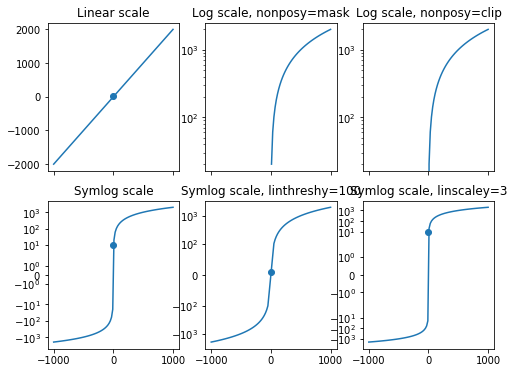

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare 100 evenly spaced numbers from -200 to 200
x = np.linspace(-1000, 1000, 100)
y = x * 2
# Setup subplot with 3 rows and 2 columns, with shared x-axis.
# More details about subplots will be discussed in Chapter 3.
f, axarr = plt.subplots(2,3, figsize=(8,6), sharex=True)
for i in range(2):
    for j in range(3):
        axarr[i,j].plot(x, y)
        # Horizontal line (y=10)
        axarr[i,j].scatter([0], [10])

# Linear scale
axarr[0,0].set_title('Linear scale')

# Log scale, mask non-positive numbers
axarr[0,1].set_title('Log scale, nonposy=mask')
axarr[0,1].set_yscale('log', nonposy='mask')

# Log scale, clip non-positive numbers
axarr[0,2].set_title('Log scale, nonposy=clip')
axarr[0,2].set_yscale('log', nonposy='clip')

# Symlog
axarr[1,0].set_title('Symlog scale')
axarr[1,0].set_yscale('symlog')

# Symlog scale, expand the linear range to -100,100 (default=None)
axarr[1,1].set_title('Symlog scale, linthreshy=100')
axarr[1,1].set_yscale('symlog', linthreshy=100)

# Symlog scale, expand the linear scale to 3 (default=1)
# The linear region is expanded, while the log region is compressed.
axarr[1,2].set_title('Symlog scale, linscaley=3')
axarr[1,2].set_yscale('symlog', linscaley=3)
plt.show()

# More on Pandas-Matplotlib integration

Pandas provides the DataFrame data structure commonly used in handling multivariate data. When we usually use the Pandas package for data I/O, storage, and preprocessing, it also provides a number of native integrations with Matplotlib for quick visualization. 
<br>
To create these plots, we can call df.plot(kind=plot_type), df.plot.scatter(), and so on. Here is a list of available plot types:

    line: Line plot (default)
    bar: Vertical bar plot
    barh: Horizontal bar plot
    hist: Histogram
    box: Boxplot
    kde: Kernel Density Estimation (KDE) plot
    density: The same as kde
    area: Area plot
    pie: Pie plot


# Showing distribution with the KDE plot

Similar to a histogram, the KDE plot is a method to visualize the shape of data distribution. It uses kernel smoothing to create smooth curves and is often combined with a histogram. It is useful in exploratory data analysis.
<br>
In the following example, we will compare the income in various age groups across different countries, with data obtained from surveys binned with different age groupings.
<br>
Here is the code for data curation:

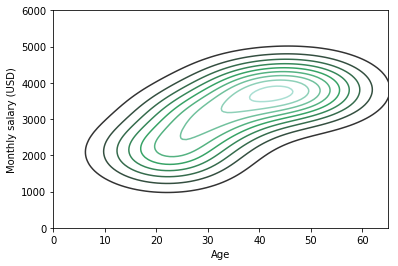

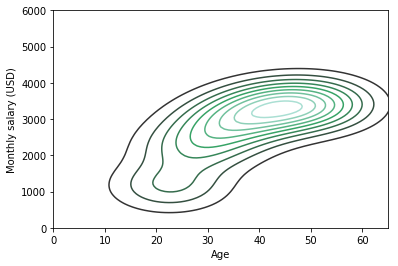

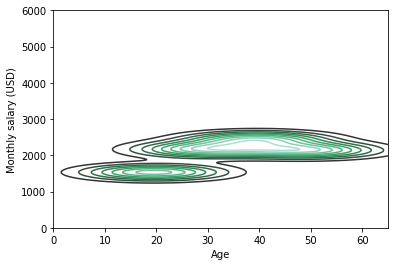

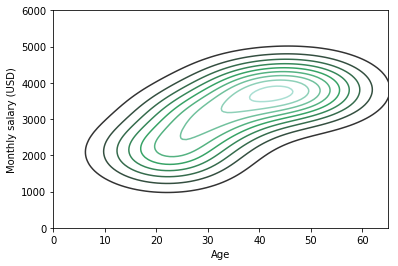

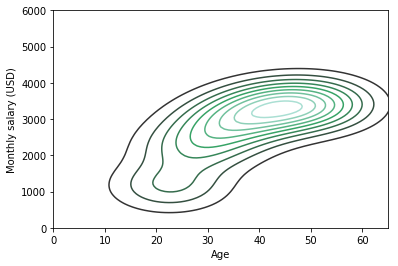

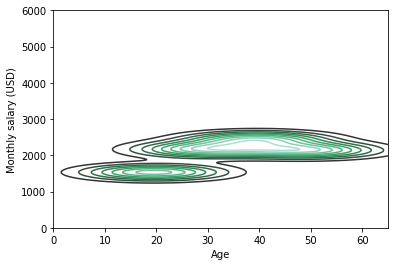

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data
# Weekly earnings of U.S. wage workers in 2016, by age
# Downloaded from Statista.com
# Source URL: https://www.statista.com/statistics/184672/median-weekly-earnings-of-full-time-wage-and-salary-workers/
us_agegroups = [22,29.5,39.5,49.5]
# Convert to a rough estimation of monthly earnings by multiplying 4
us_incomes = [x*4 for x in [513,751,934,955]]

# Monthly salary in the Netherlands in 2016 per age group excluding overtime (Euro)
# Downloaded from Statista.com 
# Source URL: https://www.statista.com/statistics/538025/average-monthly-wage-in-the-netherlands-by-age/
# take the center of each age group
nl_agegroups = [22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5]
nl_incomes = [x*1.113 for x in [1027, 1948, 2472, 2795, 2996, 3069, 3070]]

# Median monthly wage analyzed by sex, age group, educational attainment, occupational group and industry section
# May-June 2016 (HKD)
# Downloaded form the website of Censor and Statistics Department of the HKSAR government
# Source URL: https://www.censtatd.gov.hk/fd.jsp?file=D5250017E2016QQ02E.xls&product_id=D5250017&lang=1
hk_agegroups = [19.5, 29.5, 39.5, 49.5]
hk_incomes = [x/7.770 for x in [11900,16800,19000,16600]]
import seaborn as sns
def kdeplot_income_vs_age(agegroups,incomes):
    plt.figure()
    sns.kdeplot(agegroups,incomes)
    plt.xlim(0,65)
    plt.ylim(0,6000)
    plt.xlabel('Age')
    plt.ylabel('Monthly salary (USD)')
    return

kdeplot_income_vs_age(us_agegroups,us_incomes)
kdeplot_income_vs_age(nl_agegroups,nl_incomes)
kdeplot_income_vs_age(hk_agegroups,hk_incomes)
plt.show()

Of course, the figure is not a very accurate reflection of the original data, as extrapolation was involved before any tweaking (for instance, we do not have child labor data here, but the contours extend even to children below age 10). Yet, we can observe a general difference in the pattern of income structures between ages 20 and 50 across the three economies, and to what extent the downloaded public data is comparable. We may then be able to suggest surveys with more useful groupings and perhaps to get more raw data points to suit our analyses.

# Showing the density of bivariate data with hexbin plots

Scatter plot is a common method to show the distribution of data in a more raw form. But when data density goes over a threshold, it may not be the best visualization method as points can overlap and we lose information about the actual distribution.
<br>
A hexbin map is a way to improve the interpretation of data density, by showing the data density in an area by color intensity.
<br>
Here is an example to compare the visualization of the same dataset that aggregates in the center:

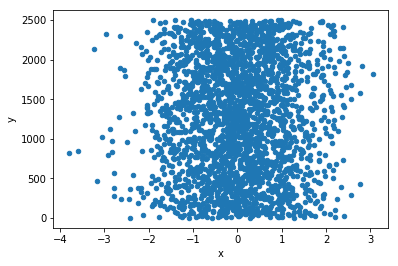

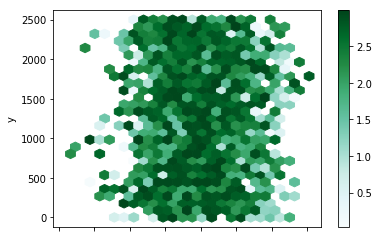

In [24]:
import pandas as pd
import numpy as np
# Prepare 2500 random data points densely clustered at center
np.random.seed(123)

df = pd.DataFrame(np.random.randn(2500, 2), columns=['x', 'y'])
df['y'] = df['y'] = df['y'] + np.arange(2500)
df['z'] = np.random.uniform(0, 3, 2500)

# Plot the scatter plot
ax1 = df.plot.scatter(x='x', y='y')
# Plot the hexbin plot
ax2 = df.plot.hexbin(x='x', y='y', C='z', reduce_C_function=np.max,gridsize=25)

plt.show()

As for the hexbin map in ax2, although not all discrete raw data points are shown, we can clearly see the variation of data distribution in the center:


# Expanding plot types with Seaborn 

To install the Seaborn package, we open the terminal or command prompt and call pip3 install --user seaborn. For each use, we import the library by import seaborn as sns, where sns is a commonly used shorthand to save typing.

# Visualizing multivariate data with a heatmap

A heatmap is a useful visualization method to illustrate multivariate data when there are many variables to compare, such as in a big data analysis. It is a plot that displays values in a color scale in a grid. It is among the most common plots utilized by bioinformaticians to display hundreds or thousands of gene expression values in one plot.
<br><br>
With Seaborn, drawing a heatmap is just one line away from importing the library. It is done by calling sns.heatmap(df), where df is the Pandas DataFrame to be plotted. We can supply the cmap parameter to specify the color scale ("colormap") to be used. You can revisit the previous chapter for more details on colormap usage.
<br><br>
To get a feel for heatmap, in the following example, we demonstrate the usage with the specification of the 7th and 8th generations of Intel Core CPUs, which involves dozens of models and four chosen metrics. Before looking at the plotting code, let's look at the structure of the Pandas DataFrame that stores the data:

In [ ]:
# Data obtained from https://ark.intel.com/#@Processors
import pandas as pd

cpuspec = pd.read_csv('intel-cpu-7+8.csv').set_index('Name')
print(cpuspec.info())
cpuspec.head()
cpuspec['Max Frequency'] = cpuspec['Max Frequency'].fillna(cpuspec['Base Frequency'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13,13))
sns.heatmap(cpuspec.drop(['Gen'],axis=1),cmap='Blues')
plt.xticks(fontsize=16)
plt.show()


# Showing hierarchy in multivariate data with clustermap

Sometimes, a heatmap illustration can be hard to interpret when there are too many alternating color bands. This is because our data may not be ordered in terms of similarity. In this case, we need to group more similar data together in order to see the structure.

For this purpose, Seaborn offers the clustermap API, which is a combination of heatmap and dendrogram. A dendrogram is a tree-shaped graph that clusters more similar variables under the same branches/leaves. Drawing a dendrogram involves generally unsupervised hierarchical clustering, which is run in the background by default when we call the clustermap() function.

Besides unsupervised clustering, if we have a priori knowledge of certain labels, we can also show it in colors with the row_colors keyword argument.

Here, we extend from the preceding heatmap example of CPU models, draw a clustered heatmap, and label the generation as row colors. Let's look at the code:

In [ ]:
import seaborn as sns

row_colors = cpuspec['Gen'].map({7:'#a2ecec',8:'#ecaabb'}) # map color values to generation
sns.clustermap(cpuspec.drop(['Gen'],axis=1),standard_scale=True,cmap='Blues',row_colors=row_colors);